In [1]:
# libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# data
from data.array import array_data
from data.sys_data import sys_data 

# setup
sns.set_theme()

print(sys_data.peak_theoretical_bandwidth * 8, "GB/s")
print(array_data.data)

42.94967296 GB/s
{'Input Size': [10000, 20000, 30000, 40000], 'Time': [0.004, 0.006, 0.008, 0.01], 'Type': 'Array Benchmark'}


In [2]:
dataset = {
    'Input Size': [n for n in array_data.data['Input Size']],
    'Time': [t * n for t, n in zip(array_data.data['Input Size'], array_data.data['Time'])],
    'Type': array_data.data['Type'],
}
df = pd.DataFrame(dataset)

In [3]:
# set theoretical max data
df_theory = pd.DataFrame({
    'Input Size': [n for n in array_data.data['Input Size']],
    'Time': [ n / (sys_data.peak_theoretical_bandwidth*8) for n in array_data.data['Input Size'] ],
    'Type': 'Peak Theoretical Bandwidth'
})
df = pd.concat([df, df_theory])

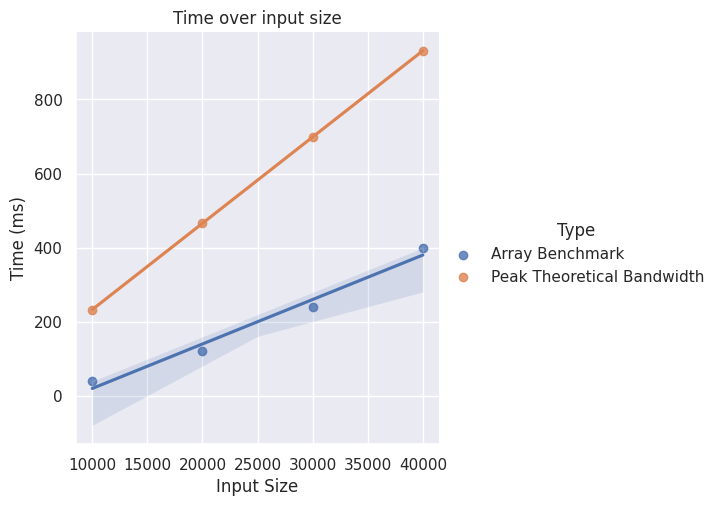

In [10]:
sns.lmplot(
    data=df, hue='Type', 
    x="Input Size", y="Time",
)
plt.title('Time over input size')
plt.xlabel('Input Size')
plt.ylabel('Time (ms)')
plt.show()